# 03 - Stats Review: The Most Dangerous Equation

Howard Wainer는 2007년 그의 유명한 [논문](http://assets.press.princeton.edu/chapters/s8863.pdf)을 통해 매우 위험한 방정식에 대해 다음과 같이 썼습니다.

"어떤 방정식은 알면 위험하고, 어떤 방정식은 모르면 위험합니다. 첫 번째 종류는 방정식의 비밀이 끔찍한 결과를 이끌기 때문에 위험을 초래할 수 있습니다. 대표적인 방정식은 아인슈타인의 질량-에너지 등가 방정식 $E = MC^2$인데, 이는 평범한 물질 안에 숨겨진 거대한 에너지 척도를 제공하기 때문입니다. \[...\] 대신에 저는 우리가 알지 못할 때 위험한 방정식에 관심있습니다. 이 방정식들은 사물을 명확하게 이해할 수 있게 해주지만, 이들의 부재는 우리를 위험할 정도로 무지하게 만듭니다."

그가 말하는 방정식은 De Moivre’s(드무아브르) 방정식입니다.

$
SE = \dfrac{\sigma}{\sqrt{n}} 
$

$SE$는 평균의 표준 오차, $\sigma$는 표준 편차, $n$은 샘플 크기입니다. 용감하고 진실한 사람이 마스터해야 할 수학처럼 들리네요. 그러니 시작해보죠.

이 방정식을 모르는 것이 왜 매우 위험한지 알아보기 위해, 몇 가지 교육 데이터를 살펴보겠습니다. 저는 3년 동안 다른 학교의 ENEM 점수(SAT와 유사한 브라질 표준화 고등학교 점수)에 대한 데이터를 수집했습니다. 또한, 관련된 정보만 남겨두기 위해 데이터를 처리했습니다. 원본 데이터는 [Inep website](http://portal.inep.gov.br/web/guest/microdados#)에서 다운로드 받을 수 있습니다.

가장 성적이 좋은 학교를 살펴볼때, 눈길을 끄는 것이 있습니다. 학교의 학생 수가 적다는 것입니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("./data/enem_scores.csv")
df.sort_values(by="avg_score", ascending=False).head(10)

,year,school_id,number_of_students,avg_score
16670,2007,33062633,68,82.97
16796,2007,33065403,172,82.04
16668,2005,33062633,59,81.89
16794,2005,33065403,177,81.66
10043,2007,29342880,43,80.32
18121,2007,33152314,14,79.82
16781,2007,33065250,80,79.67
3026,2007,22025740,144,79.52
14636,2007,31311723,222,79.41
17318,2007,33087679,210,79.38


다른 각도에서 보면 상위권 학교 1%만 분리해 연구할 수 있습니다. 그들은 어떤 사람들인가요? 가장 좋은 사례로부터 무언가를 배우고 다른 곳에 적용할 수 있을 것입니다. 상위 1%의 학교를 보면, 평균적으로 학생 수가 적다는 것을 알 수 있습니다.

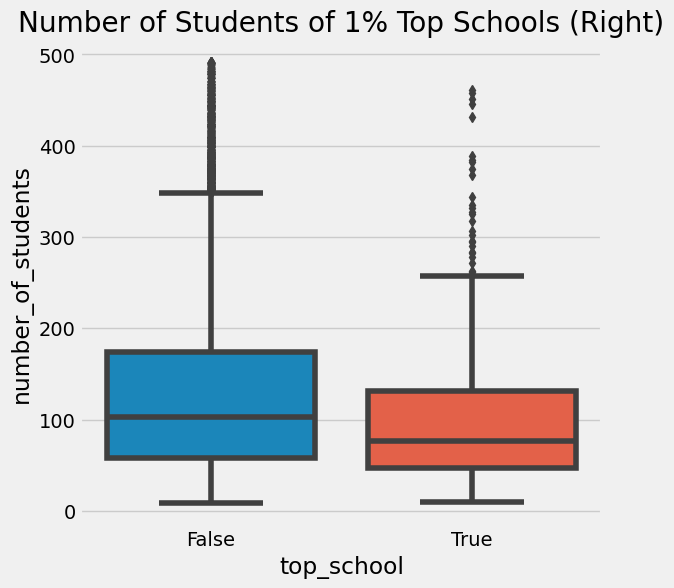

In [3]:
plot_data = (df
             .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
             [["top_school", "number_of_students"]]
             .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}")) # remove outliers

plt.figure(figsize=(6,6))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data)
plt.title("Number of Students of 1% Top Schools (Right)");

한 가지 자연스러운 결론은 작은 학교가 더 높은 학업 성취도로 이어진다는 것입니다. 선생님 한 명당 학생 수가 적으면 학생 한 명 한 명에게 집중적인 관심을 줄 수 있어 이치에 맞습니다. 하지만 드무아부르 방정식과 무슨 관련이 있을까요? 그리고 왜 위험할까요?

사람들이 이 정보를 바탕으로 중요하고 값비싼 결정을 내리면 위험해집니다. Howard는 말합니다.

"90년대에는 학교 규모를 줄이자는 주장이 인기를 끌었습니다. 많은 자선 단체와 정부 기관들은 작은 학교의 학생이 높은 시험 점수를 가진 그룹을 과도하게 대표해 큰 학교를 분할하는데 필요한 자금을 지원했습니다."

사람들이 간과한 점은 하위 1%를 보는 것이었습니다. 한번 확인해 봅시다. 그들 또한 학생 수가 매우 적습니다!

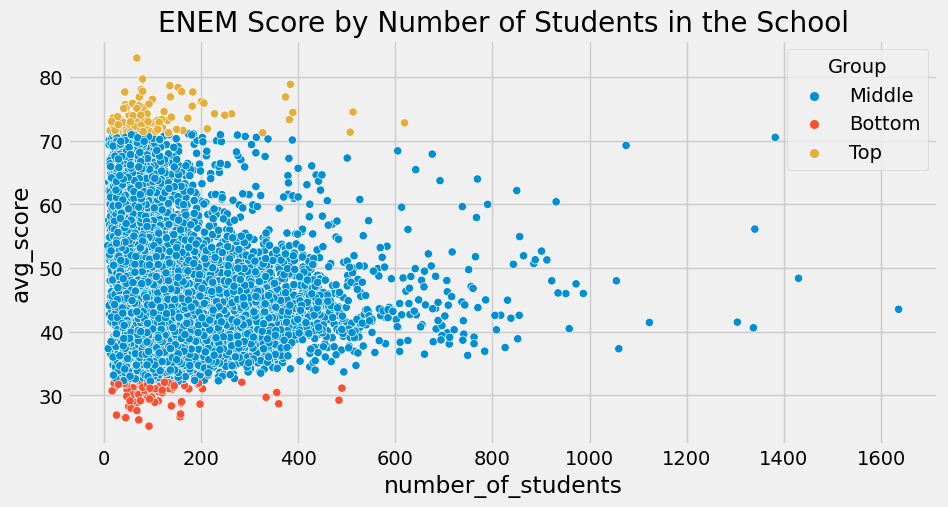

In [4]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
             .sample(10000)
             .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
                                                 ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data)
plt.title("ENEM Score by Number of Students in the School");

이는 드무아브르 방정식이 말하는 바를 정확이 보여줍니다. 학생의 수가 증가함에 따라, 평균 점수는 점점 더 정확해집니다. 샘플이 매우 적은 학교는 단지 우연 때문에 매우 높은 점수와 낮은 점수를 받을 수 있습니다. 큰 학교에서는 가능성이 적은 일입니다. 드무아브르 방정식은 진짜 정보와 데이터 형태의 기록에 대한 근본적인 사실을 알려줍니다. (항상 부정확합니다.) 질문은 얼마나 부정확한지입니다.

통계학은 부정확성을 다루는 과학이기 때문에 당황스럽진 않습니다. Taleb 그의 책에서 말했듯이, 무작위성에 속습니다.

> 확률은 단지 주사위 확률과 같은 단순한 계산이 아닙니다. 지식에 대한 확신의 부족을 받아들이고 무지를 다루는 방법을 개발하는 것입니다.

불확실성을 정량화하는 한 가지 방법은 **추정치의 분산**입니다. 분산은 관측치가 중앙값 및 가장 가능성이 높은 값에서 얼마나 떨어질 수 있는지 나타냅니다. 드무아브르 방정식에서 알 수 있듯이, 불확실성은 우리가 관찰하는 데이터의 양이 늘어남에 따라 감소합니다. 말이 되죠? 만약 많은 학생이 학교에서 우수한 성적낸다면, 정말 좋은 학교라 확신할 수 있습니다. 하지만 10명의 학생 중 8명이 좋은 성적을 내는 학교라면 더 의심할 필요가 있습니다. 학교에 우연히 평균 이상의 학생들이 있었을 수 있습니다.

위의 아름다운 삼각형 그래프는 이야기를 정확히 말해줍니다. 우리가 위에서 보는 아름다운 삼각형의 줄거리는 이 이야기를 정확하게 말해줍니다. 표본 크기가 작으면 성적에 대한 추정치가 어떻게 크게 차이나는지 보여줍니다. 또한 표본 크기가 증가함에 따라 분산이 작아짐을 보여줍니다. 이는 학교 평균 점수 외에요 우리가 추정하고자 하는 `ATE`를 포함하 모든 요약 통계에 해당됩니다.

##  The Standard Error of Our Estimates

통계학을 리뷰하는 것으로 지금은 조금 빠르게 진행하겠습니다. 분포, 분산 및 표준 오차에 대해 잘 모르는 경우 계속 읽어보되 부족하다면 추가 자료를 찾아보세요. 통계학 입문에 관한 MIT 과정을 검색해 보는 것을 추천드립니다. 꽤 잘 설명되어 있어요.

2장에서 평균 처치 효과 $E[Y_1-Y_0]$는 처치 된 것과 그렇지 않은 것 차이의 평균 $E[Y|T=1]-E[Y|T=0]$으로 추정했습니다. 쉬운 사례를 통해 온라인 수업에 대한 $ATE$를 알아냈습니다. 또한 부정적인 결과를 확인했는데, 온라인 수업은 대면 수업보다 성적을 약 5점 떨어뜨렸습니다. 이제 이 영향이 통계적으로 중요한지 확인할 수 있습니다.

이를 위해 $SE$를 추정해야 합니다. 이미 샘플 사이즈인 $n$은 가지고 있습니다. 표준 편차는 아래 수식에 따라 얻습니다.

$$
\hat{\sigma}=\sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i-\bar{x})^2}
$$

$\bar{x}$는 $x$의 평균입니다. 다행히도 대부분의 프로그래밍 소프트웨어는 이미 이를 구현하고 있습니다. `pandas`의 [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)를 사용할 수 있습니다.

In [5]:
data = pd.read_csv("./data/online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]

def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))

print("SE for Online:", se(online))
print("SE for Face to Face:", se(face_to_face))

SE for Online: 1.5371593973041635
SE for Face to Face: 0.8723511456319106


## Confidence Intervals

추정치의 표준 오차는 신뢰 척도입니다. 확히 이해하기 위해서는 격동적이고 논쟁적인 통계 바다에 빠질 필요가 있습니다. 빈도주의 관점에서 데이터는 정확한 데이터 생성 프로세스의 표현일 뿐이라 말할수 있습니다. 이 과정은 추상적이고 이상적입니다. 변하지 않고 알려지지 않은 진정한 매개변수에 의해 지배됩니다. 학생의 성적을 여러번 수집할 수 있다면 데이터 세트들은 기본 데이터 생성 프로세스와 비슷하지만 완전히 같지는 않을 것입니다. 이는 플라톤의 글과 매우 유사합니다.

> 개별 [본질적인 형태]는 행동, 물질, 다른 것과 함께 다양한 조합으로 나타난다. 이는 매우 다양하게 보인다.

이해를 위해 학생들의 시험 점수에 대한 진정한 추상적인 분포를 가지고 있다고 가정해 보겠습니다. 이 분포는 평균이 74이고 표준 편차가 2인 정규 분포입니다. 이 분포로 실험을 10000번 수행합니다. 각 실험은 500개의 샘플로 이루어 집니다. 히스토그램으로 그래프를 표시하면 실험의 평균이 실제 평균을 중심으로 분포되어 있음을 알 수 있습니다. 일부 실험 데이터는 실제 데이터보다 평균이 낮고 일부는 더 높습니다.

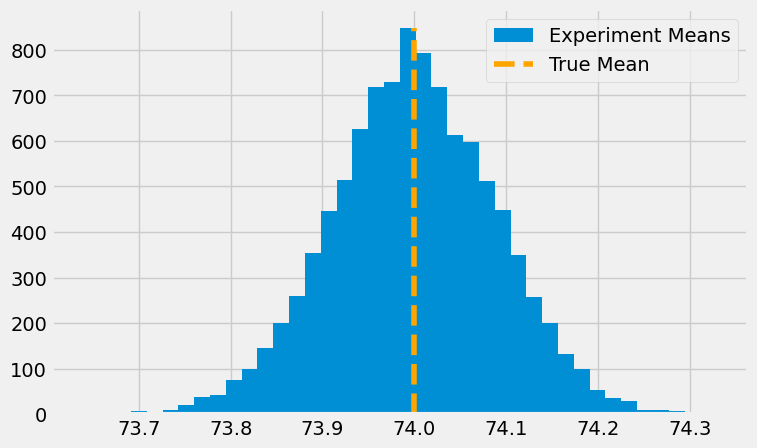

In [6]:
true_std = 2
true_mean = 74

n = 500
def run_experiment(): 
    return np.random.normal(true_mean,true_std, 500)

np.random.seed(42)

plt.figure(figsize=(8,5))
freq, bins, img = plt.hist([run_experiment().mean() for _ in range(10000)], bins=40, label="Experiment Means")
plt.vlines(true_mean, ymin=0, ymax=freq.max(), linestyles="dashed", label="True Mean", color="orange")
plt.legend();


여기서는 평균들의 평균에 대해 이야기하고 있다는 것에 주목하세요. 평균은 우연히 실제 평균보다 약간 낮거나 높을 수 있습니다. 즉, 실험의 평균이 진정한 플라토닉 및 이상적인 평균과 일치한다고 확신할 수 없습니다. 그러나 **표준 오차로 95%의 실제 평균을 포함하는 구간은 만들 수 있습니다.**

실제로 여러 데이터 세트로 동일한 실험을 시뮬레이션할 여유는 없습니다. 우리는 하나만 가지고 있어요. 하지만 위의 직관을 통해 **신뢰 구간**이라 부르는 것을 구성할 수 있습니다. 신뢰 구간에는 확률이 붙습니다. 95%가 가장 일반적입니다. 이 확률은 실제 평균을 포함하는 서로 다른 연구의 가상 신뢰 구간을 알려줍니다. 예를 들어 유사한 연구에서 계산된 95% 신뢰 구간에는 95%의 실제 평균이 포함됩니다.

신뢰 구간을 계산하기 위해 **중심극한정리**를 사용합니다. 중심극한정리는 **실험의 평균이 정규 분포를 따른다는 것을 말해줍니다.** 통계 이론으로 95%는 정규분포의 `2` 표준 편차 사이에 해당됨을 알 수 있습니다. 엄밀히 따지면 1.96이지만 2는 또한 충분히 가깝습니다.

![normal_density](./data/img/stats-review/normal_dist.jpeg)

평균의 표준 오차는 실험 평균의 분포에 대한 추정치 역할을 합니다. 실험의 평균에서 표준 오차에 2를 곱한 값을 빼거나 더하면 실제 평균에 대한 95% 신뢰 구간을 구성할 수 있습니다.

In [7]:
np.random.seed(321)
exp_data = run_experiment()
exp_se = exp_data.std() / np.sqrt(len(exp_data))
exp_mu = exp_data.mean()
ci = (exp_mu - 2 * exp_se, exp_mu + 2 * exp_se)
print(ci)

(73.82718114045632, 74.17341543460314)


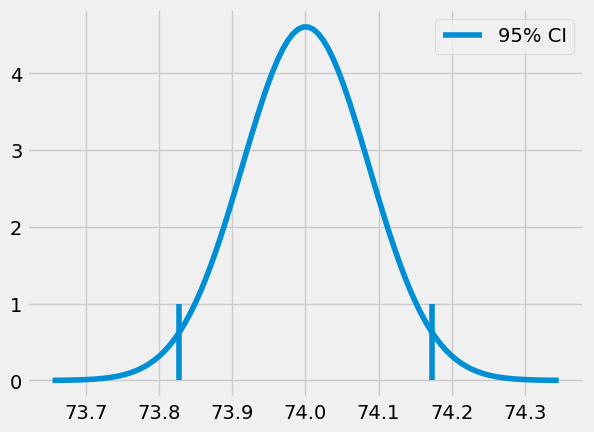

In [8]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="95% CI")
plt.legend()
plt.show()

물론 신뢰 구간으로 95%로 제한할 필요는 없습니다. 99%에 해당되는 표준 편차를 찾아 99% 신뢰 구간을 생성할 수도 있습니다.

`python`의 `ppf` 함수는 CDF의 역을 제공합니다. 95% CI를 찾았을 때처럼 표준 오차에 2를 곱하는 대신, `z`를 곱하면 99% CI가 됩니다. 따라서 `ppf(0.5)`는 0.0을 반환하는데, 정규분포의 50%가 0.0보다 작기 때문입니다. 같은 이유로, 99.5%에 대항하는 `z`를 얻게된다면 분포의 99.5%는 이 값 아래로 떨어집니다. 즉, 전체 중 0.5%가 이 값을 넘어갑니다.

In [9]:
from scipy import stats
z = stats.norm.ppf(.995)
print(z)
ci = (exp_mu - z * exp_se, exp_mu + z * exp_se)
ci

2.5758293035489004


(73.7773381773405, 74.22325839771896)

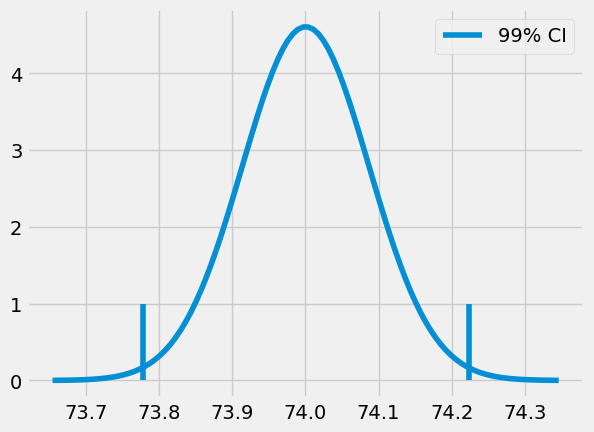

In [10]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="99% CI")
plt.legend()
plt.show()

교실 실험으로 돌아가면 온라인 및 대면 학생 그룹 모두에 대해 평균 시험 점수에 대한 신뢰 구간을 구성할 수 있습니다.

In [11]:
def ci(y: pd.Series):
    return (y.mean() - 2 * se(y), y.mean() + 2 * se(y))

print("95% CI for Online:", ci(online))
print("95% for Face to Face:", ci(face_to_face))

95% CI for Online: (70.56094429049804, 76.7095818797147)
95% for Face to Face: (76.80278229206951, 80.29218687459715)


We can see that the 95% CI of the groups doesn't overlap. The lower end of the CI for Face to Face class is above the upper end of the CI for online classes. This is evidence that our result is not by chance and that the true mean for students in face-to-face classes is higher than the true mean for students in online classes. In other words, there is a significant causal decrease in academic performance when switching from face-to-face to online classes.

To recap, confidence intervals are a way to place uncertainty around our estimates. The smaller the sample size, the larger the standard error, and the wider the confidence interval. Since they are super easy to compute, lack of confidence intervals signals either some bad intentions or simply lack of knowledge, which is equally concerning. Finally, you should always be suspicious of measurements without any uncertainty metric. 

![img](data/img/stats-review/ci_xkcd.png)

One final word of caution here. Confidence intervals are trickier to interpret than at first glance. For instance, I **shouldn't** say that this particular 95% confidence interval contains the true population mean with 95% chance. In frequentist statistics that use confidence intervals, the population mean is regarded as a true population constant. So it either is or isn't in our particular confidence interval. In other words, our specific confidence interval either contains or doesn't contain the true mean. If it does, the chance of containing it would be 100%, not 95%. If it doesn't, the chance would be 0%. Instead, in confidence intervals, the 95% refers to the frequency that such confidence intervals, computed in many studies, contain the true mean. 95% is our confidence in the algorithm used to calculate the 95% CI, not on the particular interval itself.

Now, having said that, as an Economist (statisticians, please look away now), I think this purism is not very useful. In practice, you will see people saying that the particular confidence interval contains the true mean 95% of the time. Although wrong, this is not very harmful, as it still places a precise degree of uncertainty in our estimates. Moreover, if we switch to Bayesian statistics and use probable intervals instead of confidence intervals, we would be able to say that the interval contains the distribution mean 95% of the time. Also, from what I've seen in practice, with decent sample sizes, bayesian probability intervals are more similar to confidence intervals than Bayesian, and frequentists would like to admit. So, if my word counts for anything, feel free to say whatever you want about your confidence interval. I don't care if you say they contain the true mean 95% of the time. Please never forget to place them around your estimates; otherwise, you will look silly. 


## Hypothesis Testing

Another way to incorporate uncertainty is to state a hypothesis test: is the difference in means statistically different from zero (or any other value)? We will recall that the sum or difference of 2 independent normal distributions is also normal distribution. The resulting mean will be the sum or difference between the two distributions, while the variance will always be the sum of the variance:

$
N(\mu_1, \sigma_1^2) - N(\mu_2, \sigma_2^2) = N(\mu_1 - \mu_2, \sigma_1^2 + \sigma_2^2)
$

$
N(\mu_1, \sigma_1^2) + N(\mu_2, \sigma_2^2) = N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)
$

If you don't recall, its OK. We can always use code and simulated data to check:

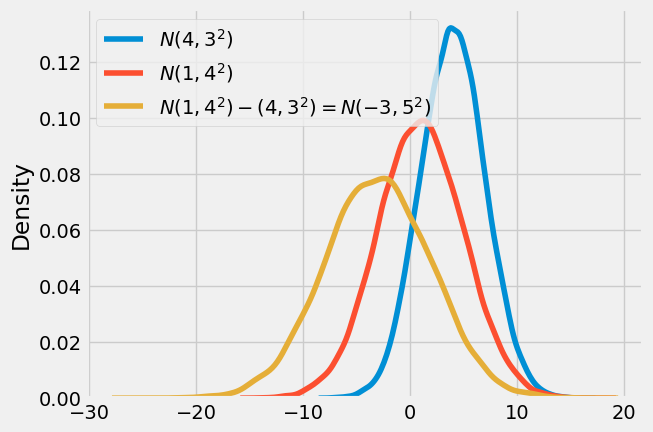

In [12]:
np.random.seed(123)
n1 = np.random.normal(4, 3, 30000)
n2 = np.random.normal(1, 4, 30000)
n_diff = n2 - n1
sns.distplot(n1, hist=False, label="$N(4,3^2)$")
sns.distplot(n2, hist=False, label="$N(1,4^2)$")
sns.distplot(n_diff, hist=False, label=f"$N(1,4^2) - (4,3^2) = N(-3, 5^2)$")
plt.legend()
plt.show()

If we take the distribution of the means of our 2 groups and subtract one from the other, we will have a third distribution. The mean of this final distribution will be the difference in the means, and the standard deviation of this distribution will be the square root of the sum of the standard deviations.

$
\mu_{diff} = \mu_1 - \mu_2
$

$
SE_{diff} = \sqrt{SE_1 + SE_2} = \sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}
$

Let's return to our classroom example. We will construct this distribution of the difference. Of course, once we have it, building the 95% CI is straightforward.

In [13]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
ci = (diff_mu - 1.96*diff_se, diff_mu + 1.96*diff_se)
print(ci)

(-8.376410208363385, -1.4480327880905248)


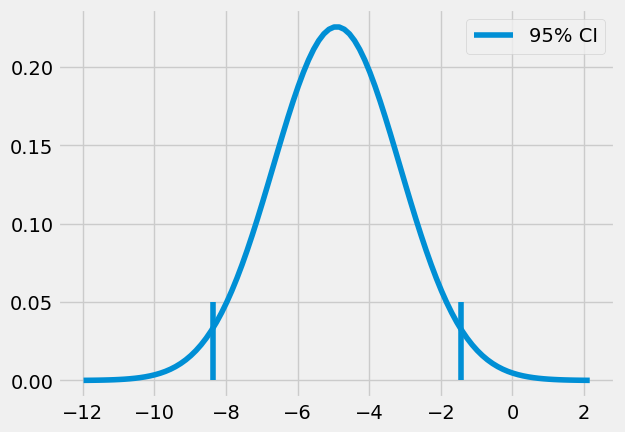

In [14]:
x = np.linspace(diff_mu - 4*diff_se, diff_mu + 4*diff_se, 100)
y = stats.norm.pdf(x, diff_mu, diff_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=.05)
plt.vlines(ci[0], ymin=0, ymax=.05, label="95% CI")
plt.legend()
plt.show()

With this at hand, we can say that we are 95% confident that the true difference between the online and face-to-face groups falls between -8.37 and -1.44. We can also construct a **z statistic** by dividing the difference in mean by the $SE$ of the differences.

$
z = \dfrac{\mu_{diff} - H_{0}}{SE_{diff}} = \dfrac{(\mu_1 - \mu_2) - H_{0}}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}
$

Where $H_0$ is the value which we want to test our difference against.

The z statistic is a measure of how extreme the observed difference is. We will use contradiction to test our hypothesis that the difference in the means is statistically different from zero. We will assume that the opposite is true; we will assume that the difference is zero. This is called a null hypothesis, or $H_0$. Then, we will ask ourselves, "is it likely that we would observe such a difference if the true difference were zero?" We can translate this question to checking how far from zero is our z statistic in statistical math terms. 

Under $H_0$, the z statistic follows a standard normal distribution. So, if the difference is indeed zero, we would see the z statistic within 2 standard deviations of the mean 95% of the time. The direct consequence is that if z falls above or below 2 standard deviations, we can reject the null hypothesis with 95% confidence.

Let's see how this looks like in our classroom example.

In [15]:
z = diff_mu / diff_se
print(z)

-2.7792810791031224


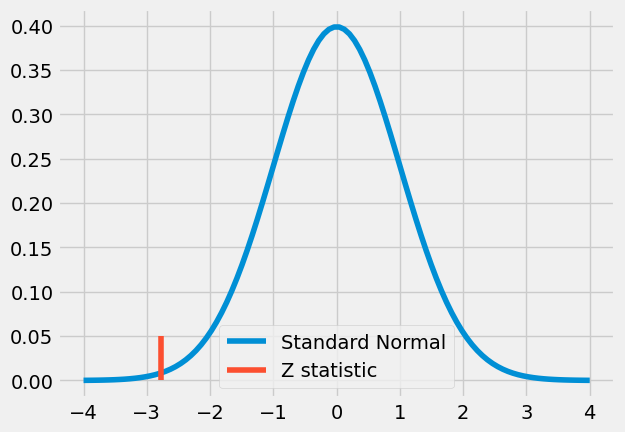

In [16]:
x = np.linspace(-4,4,100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label="Standard Normal")
plt.vlines(z, ymin=0, ymax=.05, label="Z statistic", color="C1")
plt.legend()
plt.show()

This looks like a pretty extreme value. Indeed, it is above 2, which means there is less than a 5% chance that we would see such an extreme value if there were no difference in the groups. This again leads us to conclude that switching from face-to-face to online classes causes a statistically significant drop in academic performance.

One final interesting thing about hypothesis tests is that it is less conservative than checking if the 95% CI from the treated and untreated group overlaps. In other words, if the confidence intervals in the two groups overlap, it can still be the case that the result is statistically significant. For example, let's pretend that the face-to-face group has an average score of 80 with a standard error of 4, and the online group has an average score of 71 with a standard error of 2. 

In [17]:
cont_mu, cont_se =  (71, 2)
test_mu, test_se = (80, 4)

diff_mu = test_mu - cont_mu
diff_se = np.sqrt(cont_se**2 + test_se**2)

print("Control 95% CI:", (cont_mu-1.96*cont_se, cont_mu+1.96*cont_se))
print("Test 95% CI:", (test_mu-1.96*test_se, test_mu+1.96*test_se))
print("Diff 95% CI:", (diff_mu-1.96*diff_se, diff_mu+1.96*diff_se))

Control 95% CI: (67.08, 74.92)
Test 95% CI: (72.16, 87.84)
Diff 95% CI: (0.23461352820082482, 17.765386471799175)


If we construct the confidence intervals for these groups, they overlap. The upper bound for the 95% CI of the online group is 74.92, and the lower bound for the face-to-face group is 72.16. However, once we compute the 95% confidence interval for the difference between the groups, we can see that it does not contain zero. Even though the individual confidence intervals overlap, the difference can still be statistically different from zero.

## P-values

Previously, I've said that there is less than a 5% chance we would observe such an extreme value if the difference between online and face-to-face groups were actually zero. But can we precisely estimate what that chance is? How likely are we to observe such an extreme value? Enters p-values!

Like with confidence intervals (and most frequentist statistics, as a matter of fact), the true definition of p-values can be very confusing. So, to not take any risks, I'll copy the definition from Wikipedia: "the p-value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct". 

To put it more succinctly, the p-value is the probability of seeing such data, given that the null hypothesis is true. It measures how unlikely it is that you are seeing a measurement if the null hypothesis is true. Naturally, this often gets confused with the probability of the null hypothesis being true. Note the difference here. The p-value is NOT $P(H_0|data)$, but rather $P(data|H_0)$.

But don't let this complexity fool you. In practical terms, they are pretty straightforward to use.

![p_value](./data/img/stats-review/p_value.png)

To get the p-value, we need to compute the area under the standard normal distribution before or after the z statistic. Fortunately, we have a computer to do this calculation for us. We can simply plug the z statistic in the CDF of the standard normal distribution.

In [18]:
print("P-value:", stats.norm.cdf(z))

P-value: 0.0027239680835563383


Notice how the p-value is interesting because it avoids us having to specify a confidence level, like 95% or 99%. But, if we wish to report one, from the p-value, we know precisely at which confidence our test will pass or fail. For instance, with a p-value of 0.0027, we see that we have significance up to the 0.2% level. So, while the 95% CI and the 99% CI for the difference will neither contain zero, the 99.9% CI will. This means that there is only a 0.2% chance of observing this extreme z statistic if the difference was zero.

In [19]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
print("95% CI:", (diff_mu - stats.norm.ppf(.975)*diff_se, diff_mu + stats.norm.ppf(.975)*diff_se))
print("99% CI:", (diff_mu - stats.norm.ppf(.995)*diff_se, diff_mu + stats.norm.ppf(.995)*diff_se))
print("99.9% CI:", (diff_mu - stats.norm.ppf(.9995)*diff_se, diff_mu + stats.norm.ppf(.9995)*diff_se))

95% CI: (-8.376346553082909, -1.4480964433710017)
99% CI: (-9.46485353526404, -0.3595894611898709)
99.9% CI: (-10.728040658245558, 0.9035976617916459)


## Key Ideas

We've seen how important it is to know Moivre’s equation, and we used it to place a degree of certainty around our estimates. Namely, we figured out that online classes cause a decrease in academic performance compared to face-to-face classes. We also saw that this was a statistically significant result. We did it by comparing the Confidence Intervals of the means for the 2 groups, looking at the confidence interval for the difference, doing a hypothesis test, and looking at the p-value. Let's wrap everything up in a single function that makes A/B testing comparison like the one we did above

In [20]:
def AB_test(test: pd.Series, control: pd.Series, confidence=0.95, h0=0):
    mu1, mu2 = test.mean(), control.mean()
    se1, se2 = test.std() / np.sqrt(len(test)), control.std() / np.sqrt(len(control))
    
    diff = mu1 - mu2
    se_diff = np.sqrt(test.var()/len(test) + control.var()/len(control))
    
    z_stats = (diff-h0)/se_diff
    p_value = stats.norm.cdf(z_stats)
    
    def critial(se): return -se*stats.norm.ppf((1 - confidence)/2)
    
    print(f"Test {confidence*100}% CI: {mu1} +- {critial(se1)}")
    print(f"Control {confidence*100}% CI: {mu2} +- {critial(se2)}")
    print(f"Test-Control {confidence*100}% CI: {diff} +- {critial(se_diff)}")
    print(f"Z Statistic {z_stats}")
    print(f"P-Value {p_value}")
        
AB_test(online, face_to_face)

Test 95.0% CI: 73.63526308510637 +- 3.0127770572134565
Control 95.0% CI: 78.54748458333333 +- 1.7097768273108005
Test-Control 95.0% CI: -4.912221498226955 +- 3.4641250548559537
Z Statistic -2.7792810791031224
P-Value 0.0027239680835563383


Since our function is generic enough, we can test other null hypotheses. For instance, can we try to reject that the difference between online and face-to-face class performance is -1? With the results we get, we can say with 95% confidence that the difference is more significant than -1. But we can't say it with 99% confidence:

In [21]:
AB_test(online, face_to_face, h0=-1)

Test 95.0% CI: 73.63526308510637 +- 3.0127770572134565
Control 95.0% CI: 78.54748458333333 +- 1.7097768273108005
Test-Control 95.0% CI: -4.912221498226955 +- 3.4641250548559537
Z Statistic -2.2134920404560883
P-Value 0.013431870694630114


## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

The data used here is from a study of Alpert, William T., Kenneth A. Couch, and Oskar R. Harmon. 2016. ["A Randomized Assessment of Online Learning"](https://www.aeaweb.org/articles?id=10.1257/aer.p20161057). American Economic Review, 106 (5): 378-82.

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).